In [36]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
import seaborn as sns

In [37]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

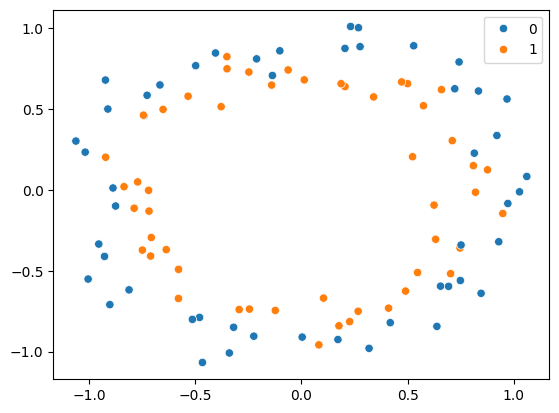

In [38]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [40]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

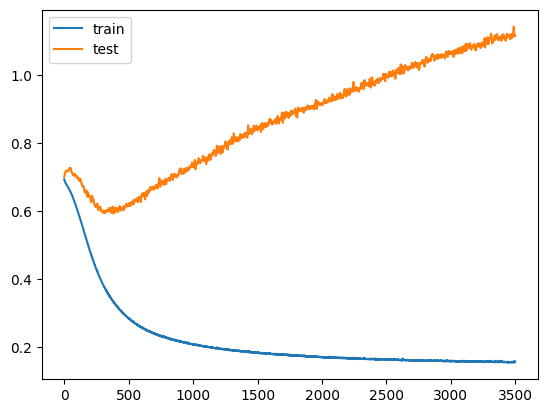

In [43]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


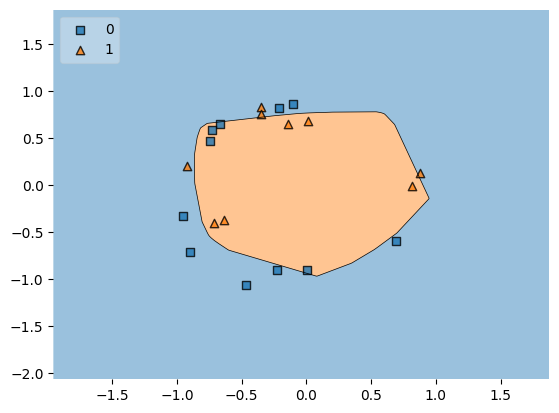

In [44]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

Early Stopping

In [45]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [48]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.5195 - loss: 0.6981 - val_accuracy: 0.4500 - val_loss: 0.6916
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4867 - loss: 0.6976 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5164 - loss: 0.6956 - val_accuracy: 0.6000 - val_loss: 0.6931
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4914 - loss: 0.6931 - val_accuracy: 0.5500 - val_loss: 0.6941
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5039 - loss: 0.6916 - val_accuracy: 0.4000 - val_loss: 0.6952
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4961 - loss: 0.6911 - val_accuracy: 0.5000 - val_loss: 0.6968
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5383 - loss: 0.6899 - val_accuracy: 0.4000 - val_loss: 0.6987
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5266 - loss: 0.6891 - val_accuracy: 0.4000 - 

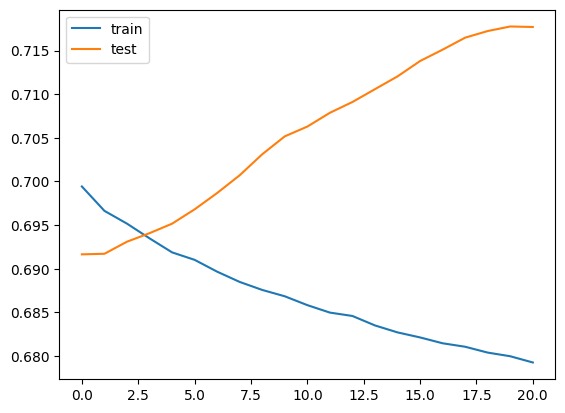

In [49]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


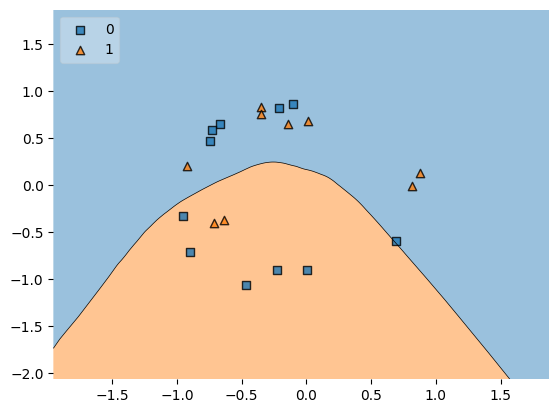

In [50]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()